In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [6]:
df = pd.read_csv('ce_train.csv')
df.head(10)

,Open,High,Low,Volume,Adj Close
0,2450.0,2542.550049,2431.000000,5572.0,2398.945068
1,2575.0,2598.000000,2530.300049,3620.0,2406.021484
2,2540.0,2599.000000,2422.550049,8347.0,2431.730957
3,2535.0,2560.000000,2470.000000,2831.0,2370.639404
4,2545.0,2555.000000,2480.000000,5054.0,2357.806885
5,2549.0,2623.899902,2532.000000,4582.0,2475.700195
6,2660.0,2660.000000,2510.000000,5758.0,2387.292969
7,2506.0,2569.000000,2457.149902,4130.0,2333.370850
8,2500.0,2545.000000,2480.000000,3489.0,2357.666016
9,2500.0,2505.000000,2440.000000,2452.0,2314.121582


In [7]:
df.shape

(3459, 5)

In [8]:
df.describe()

,Open,High,Low,Volume,Adj Close
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000
mean,21101.244834,21375.378391,20820.465856,9208.149202,20889.462389
std,22792.586531,23032.304943,22535.779161,11221.489628,22709.916485
min,1525.000000,1549.949951,1470.000000,0.000000,1490.531982
25%,3990.000000,4090.000000,3910.550049,2831.000000,3833.391602
50%,9123.950195,9285.000000,8950.000000,6335.000000,8896.114258
75%,35502.699220,35990.000000,35150.601560,11287.000000,35201.992190
max,80998.000000,81426.000000,79720.000000,158414.000000,80526.093750


### Check null values

In [9]:
df.isnull().sum()

Open         14
High         14
Low          14
Volume       14
Adj Close    14
dtype: int64

### Drop all the rows containing null values

In [10]:
print(df[df.isnull().any(axis=1)])
df = df.dropna(axis=0)

      Open  High  Low  Volume  Adj Close
209    NaN   NaN  NaN     NaN        NaN
967    NaN   NaN  NaN     NaN        NaN
1228   NaN   NaN  NaN     NaN        NaN
1229   NaN   NaN  NaN     NaN        NaN
1230   NaN   NaN  NaN     NaN        NaN
1231   NaN   NaN  NaN     NaN        NaN
1232   NaN   NaN  NaN     NaN        NaN
1257   NaN   NaN  NaN     NaN        NaN
1735   NaN   NaN  NaN     NaN        NaN
1774   NaN   NaN  NaN     NaN        NaN
1904   NaN   NaN  NaN     NaN        NaN
1946   NaN   NaN  NaN     NaN        NaN
2283   NaN   NaN  NaN     NaN        NaN
2512   NaN   NaN  NaN     NaN        NaN


In [11]:
df.dtypes

Open         float64
High         float64
Low          float64
Volume       float64
Adj Close    float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 3458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3445 non-null   float64
 1   High       3445 non-null   float64
 2   Low        3445 non-null   float64
 3   Volume     3445 non-null   float64
 4   Adj Close  3445 non-null   float64
dtypes: float64(5)
memory usage: 161.5 KB


### Plot the graph of Adj cloing values

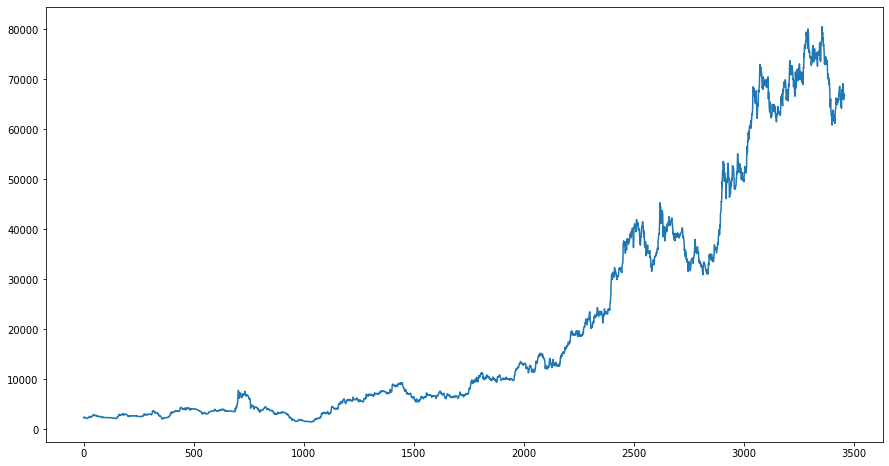

In [16]:
plt.figure(figsize=(15,8))
plt.plot(df['Adj Close'])
plt.show()

### Separate into dependent and independent variables

In [17]:
x = df.drop(['Adj Close'], axis=1)
y = df['Adj Close']
x.shape, y.shape

((3445, 4), (3445,))

### Split into 75% training and 25% testing sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2583, 4), (862, 4), (2583,), (862,))

### Feature scaling the data in range of 0 to 1

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Decision tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print(f"Mean Squared Error : {mse(y_test, y_pred)}")
print(f"Mean Absolute Error : {mae(y_test, y_pred)}")
print(f"Testing Accuracy : {100*r2_score(y_test, y_pred)}")

Mean Squared Error : 140636.30053040825
Mean Absolute Error : 190.59513877262194
Testing Accuracy : 99.97394313266187


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print(f"Mean Squared Error : {mse(y_test, y_pred)}")
print(f"Mean Absolute Error : {mae(y_test, y_pred)}")
print(f"Testing Accuracy : {100*r2_score(y_test, y_pred)}")

Mean Squared Error : 84287.47713622056
Mean Absolute Error : 151.39238715737767
Testing Accuracy : 99.98438335193886


### SVR

In [22]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
print(f"Mean Squared Error : {mse(y_test, y_pred)}")
print(f"Mean Absolute Error : {mae(y_test, y_pred)}")
print(f"Testing Accuracy : {100*r2_score(y_test, y_pred)}")

Mean Squared Error : 648978020.9028311
Mean Absolute Error : 16305.549261820226
Testing Accuracy : -20.241602859584383


### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = svr.predict(x_test)
print(f"Mean Squared Error : {mse(y_test, y_pred)}")
print(f"Mean Absolute Error : {mae(y_test, y_pred)}")
print(f"Testing Accuracy : {100*r2_score(y_test, y_pred)}")

Mean Squared Error : 648978020.9028311
Mean Absolute Error : 16305.549261820226
Testing Accuracy : -20.241602859584383


### MLP

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

params = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

mlp = GridSearchCV(MLPRegressor(hidden_layer_sizes=(10), max_iter=10000), params, cv=5)
mlp.fit(x_train, y_train)

best_param = mlp.best_params_
print('Best parameters: ', best_param)
                   
y_pred = mlp.predict(x_test)
print(f"Mean Squared Error : {mse(y_test, y_pred)}")
print(f"Mean Absolute Error : {mae(y_test, y_pred)}")
print(f"Testing Accuracy : {100*r2_score(y_test, y_pred)}")

d:\sem 5\ml\lab\env\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
d:\sem 5\ml\lab\env\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
d:\sem 5\ml\lab\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').